#### 1. Pemanggilan dataset

In [1]:
import pandas as pd
d =  pd.read_csv('student-por.csv', sep = ';')
len(d)

649

#### 2. Membuat label biner

In [2]:
d['pass'] = d.apply(lambda row: 1 if (row['G1']+row['G2']+row['G3'])>=35 else 0, axis = 1)
d=d.drop(['G1','G2','G3'],axis=1)
d.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,pass
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,4,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,2,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,6,1
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,0,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,0,1


#### 3. Membuat dummy

In [4]:
d=pd.get_dummies (d, columns = ['sex','school','address','famsize','Pstatus','Mjob','Fjob','reason','guardian','traveltime','schoolsup','famsup','paid','activities','nursery','higher','internet','romantic'])
d.head()

,age,Medu,Fedu,studytime,failures,famrel,freetime,goout,Dalc,Walc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,0,4,3,4,1,1,...,1,0,0,1,0,1,1,0,1,0
1,17,1,1,2,0,5,3,3,1,1,...,1,0,1,0,0,1,0,1,1,0
2,15,1,1,2,0,4,3,2,2,3,...,1,0,0,1,0,1,0,1,1,0
3,15,4,2,3,0,3,2,2,1,1,...,0,1,0,1,0,1,0,1,0,1
4,16,3,3,2,0,4,3,2,1,2,...,1,0,0,1,0,1,1,0,1,0


#### 4. Membuat data training dan testing

In [6]:
# mengacak baris
d = d.sample(frac=1)

# membagi data training dan testing
d_train = d[:500]
d_test = d[500:]

d_train_att = d_train.drop(['pass'], axis=1)
d_train_pass = d_train['pass']

d_test_att = d_test.drop(['pass'], axis=1)
d_test_pass = d_test['pass']

d_att = d.drop(['pass'], axis=1)
d_pass = d['pass']

# Jumlah siswa yang lulus
import numpy as np
print("Lulus: %d out of %d (%.2f%%)" % (np.sum(d_pass), len(d_pass), 100*float(np.sum(d_pass)) / len(d_pass)))


Lulus: 328 out of 649 (50.54%)


#### 5. Membangun model klasifikasi decision tree

In [8]:
#fit a decision tree
from sklearn import tree
t = tree.DecisionTreeClassifier(criterion="entropy",max_depth=5)
t = t.fit(d_train_att,d_train_pass)

#### 6. Visualisasi model decison tree

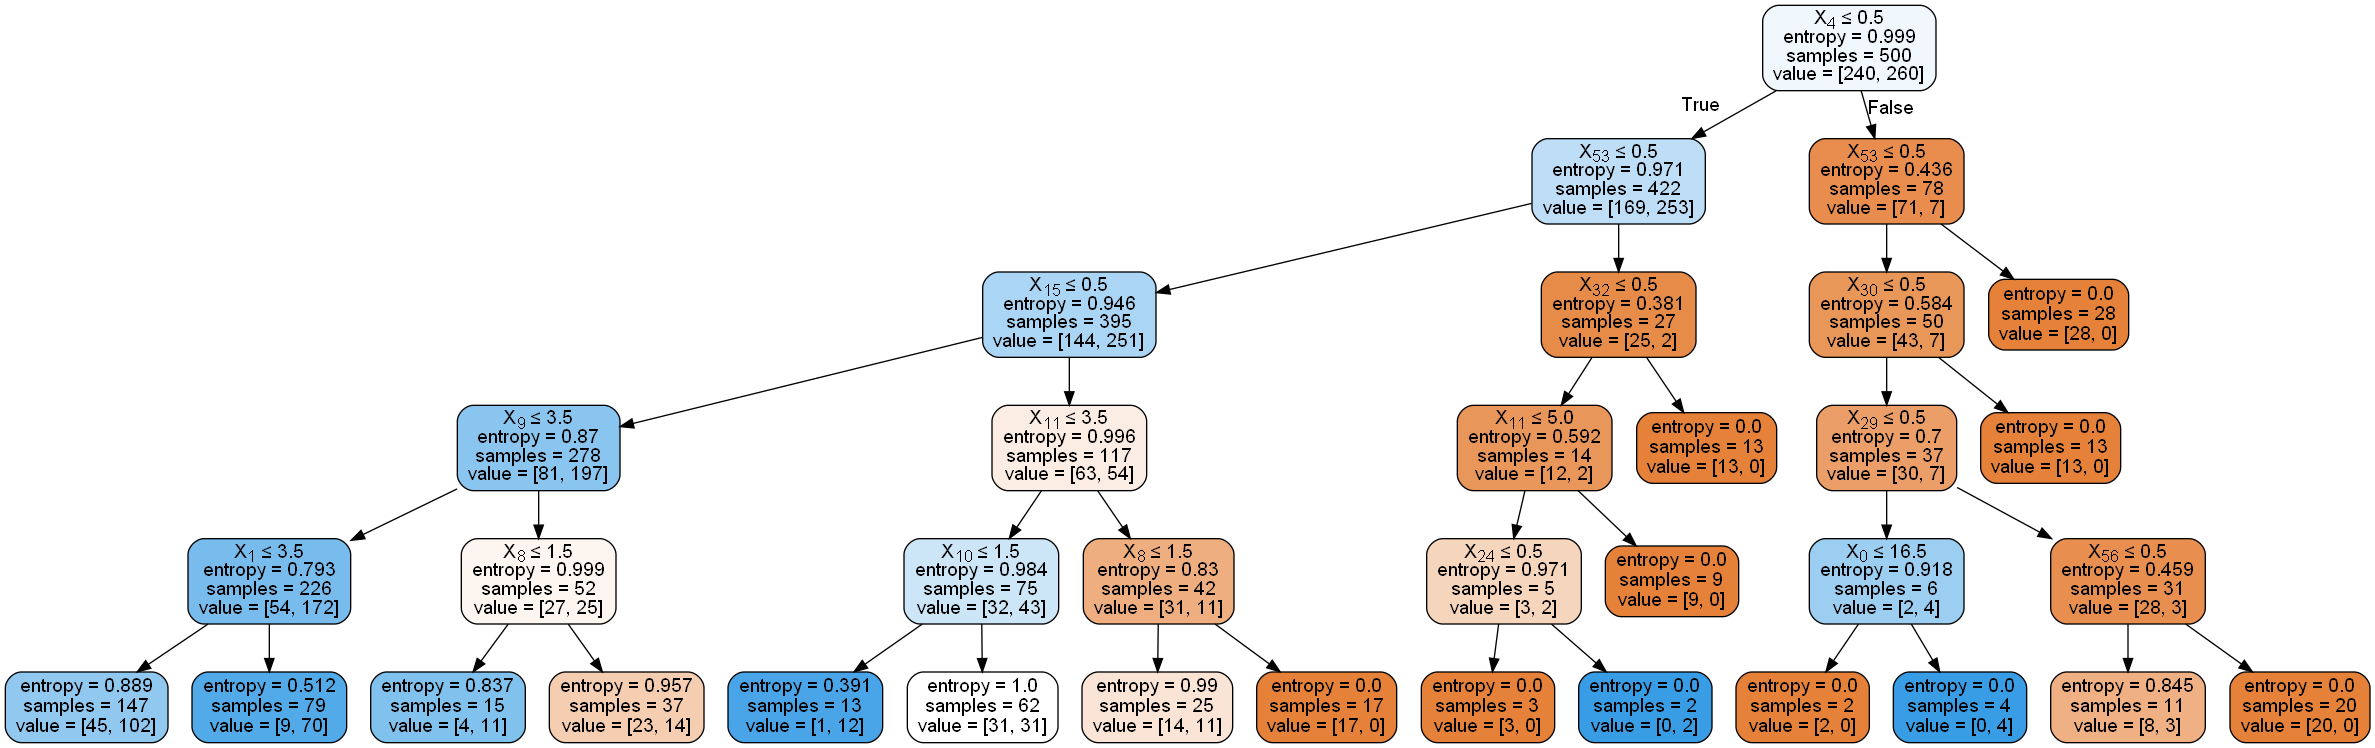

In [15]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pandas as pd
import pydotplus

tree.export_graphviz(t, out_file="student-performance.dot", label="all", impurity=False, proportion=True,
                     feature_names=list(d_train_att), class_names=["fail", "pass"], 
                     filled=True, rounded=True)

dot_data=StringIO()
export_graphviz(t,out_file=dot_data,filled=True,rounded=True,special_characters=True)

graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('student-por.png')
Image(graph.create_png())

#### 7. Tingkat akurasi data

In [17]:
t.score(d_test_att,d_test_pass)

0.697986577181208

In [21]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(t, d_att, d_pass, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.67 (+/- 0.07)


#### 8. Cross validasi

In [22]:
for max_depth in range(1, 20):
    t = tree.DecisionTreeClassifier(criterion="entropy", max_depth=max_depth)
    scores = cross_val_score(t, d_att, d_pass, cv=5)
    print("Max depth: %d, Accuracy: %0.2f (+/- %0.2f)" % (max_depth, scores.mean(), scores.std() * 2))


Max depth: 1, Accuracy: 0.64 (+/- 0.05)
Max depth: 2, Accuracy: 0.69 (+/- 0.06)
Max depth: 3, Accuracy: 0.69 (+/- 0.05)
Max depth: 4, Accuracy: 0.67 (+/- 0.10)
Max depth: 5, Accuracy: 0.67 (+/- 0.06)
Max depth: 6, Accuracy: 0.67 (+/- 0.06)
Max depth: 7, Accuracy: 0.64 (+/- 0.05)
Max depth: 8, Accuracy: 0.65 (+/- 0.06)
Max depth: 9, Accuracy: 0.64 (+/- 0.07)
Max depth: 10, Accuracy: 0.65 (+/- 0.08)
Max depth: 11, Accuracy: 0.65 (+/- 0.06)
Max depth: 12, Accuracy: 0.66 (+/- 0.09)
Max depth: 13, Accuracy: 0.64 (+/- 0.08)
Max depth: 14, Accuracy: 0.64 (+/- 0.05)
Max depth: 15, Accuracy: 0.63 (+/- 0.07)
Max depth: 16, Accuracy: 0.64 (+/- 0.09)
Max depth: 17, Accuracy: 0.63 (+/- 0.07)
Max depth: 18, Accuracy: 0.63 (+/- 0.08)
Max depth: 19, Accuracy: 0.63 (+/- 0.08)


In [23]:
depth_acc = np.empty((19,3), float)
i = 0
for max_depth in range(1, 20):
    t = tree.DecisionTreeClassifier(criterion="entropy", max_depth=max_depth)
    scores = cross_val_score(t, d_att, d_pass, cv=5)
    depth_acc[i,0] = max_depth
    depth_acc[i,1] = scores.mean()
    depth_acc[i,2] = scores.std() * 2
    i += 1
depth_acc

array([[ 1.        ,  0.63791294,  0.04835204],
       [ 2.        ,  0.68719141,  0.06461408],
       [ 3.        ,  0.6949195 ,  0.04506948],
       [ 4.        ,  0.66722719,  0.10577045],
       [ 5.        ,  0.67029219,  0.06348479],
       [ 6.        ,  0.67179487,  0.07459732],
       [ 7.        ,  0.64250447,  0.05079322],
       [ 8.        ,  0.64864639,  0.06149936],
       [ 9.        ,  0.64553369,  0.06981538],
       [10.        ,  0.63790101,  0.05677994],
       [11.        ,  0.65636255,  0.06984515],
       [12.        ,  0.64867024,  0.07484148],
       [13.        ,  0.65482409,  0.0723271 ],
       [14.        ,  0.63171139,  0.05782062],
       [15.        ,  0.62400716,  0.06478534],
       [16.        ,  0.63328563,  0.07112585],
       [17.        ,  0.6394037 ,  0.07391049],
       [18.        ,  0.64091831,  0.09015003],
       [19.        ,  0.62091831,  0.08515558]])

#### 9. Grafik nilai akurasi

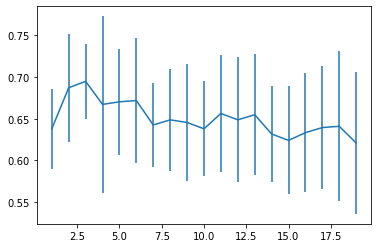

In [25]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.errorbar(depth_acc[:,0], depth_acc[:,1], yerr=depth_acc[:,2])
plt.show()